In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import config
from pre_processing import DfBankAdditional, number_to_day_of_week, number_to_month

plt.style.use([{
    "figure.figsize":(12,9),
    "xtick.labelsize": "large",
    "ytick.labelsize": "large",
    "legend.fontsize": "x-large",
    "axes.labelsize": "x-large",
    "axes.titlesize": "xx-large",
    "axes.spines.top": False,
    "axes.spines.right": False,
    # "ytick.major.right":False,
    # "xtick.major.top":False
},'seaborn'])

In [14]:
df = DfBankAdditional(pd.read_csv(config.bank_additional_train_path, sep=';'))

## Clean

In [15]:
df.process_all()

In [16]:
df = df[['day_of_week', 'month', 'campaign', 'pdays', 'previous', 'poutcome', 'y']]
df

,day_of_week,month,campaign,pdays,previous,poutcome,y
0,0,5,1,999,0,NaN,0
1,0,5,1,999,0,NaN,0
2,0,5,1,999,0,NaN,0
3,0,5,1,999,0,NaN,0
4,0,5,1,999,0,NaN,0
...,...,...,...,...,...,...,...
41183,4,11,1,999,0,NaN,1
41184,4,11,1,999,0,NaN,0
41185,4,11,2,999,0,NaN,0
41186,4,11,1,999,0,NaN,1


# Day of the Week
They never contact people on the weekend:

[Text(0, 0.5, 'Probability of Success (%)'), Text(0.5, 0, '')]

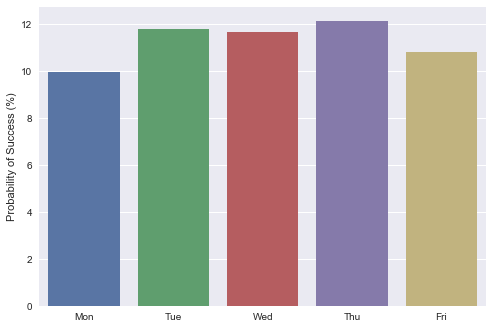

In [17]:
day_of_week_probabilities = df[['day_of_week', 'y']].groupby(by='day_of_week').mean().reset_index()
fig = sns.barplot(x=number_to_day_of_week(day_of_week_probabilities['day_of_week']),
                  y=day_of_week_probabilities['y'] * 100)
fig.set(ylabel='Probability of Success (%)',
        xlabel=None)

# Month

[Text(0, 0.5, 'Probability of Success (%)'), Text(0.5, 0, '')]

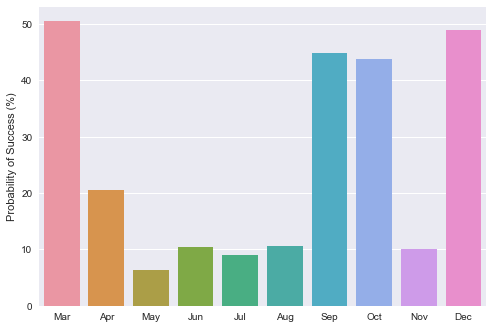

In [18]:
month_probabilities = df[['month', 'y']].groupby(by='month').mean().reset_index()
fig = sns.barplot(x=number_to_month(month_probabilities['month']),
                  y=month_probabilities['y'] * 100)
fig.set(ylabel='Probability of Success (%)',
        xlabel=None)

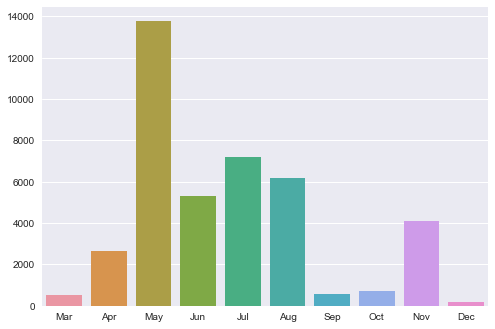

In [19]:
month_count = df['month'].value_counts(sort=False)
fig = sns.barplot(x=number_to_month(month_count.index),
                  y=month_count.values)
# TODO: overlay the plots on each other

# Time between contacts

In [20]:
previously_contacted_negative_outcome = df.loc[df['poutcome']==0, ('pdays', 'y')]
previously_contacted_positive_outcome = df.loc[df['poutcome']==1, ('pdays', 'y')]

In [21]:
probability_if_previous_negative_outcome = previously_contacted_negative_outcome['y'].mean()
probability_if_previous_negative_outcome

0.1422859830667921

In [22]:
probability_if_previous_positive_outcome = previously_contacted_positive_outcome['y'].mean()
probability_if_previous_positive_outcome

0.651128914785142

[Text(0, 0.5, 'Probability of Success (%)'),
 Text(0.5, 0, 'Days Since Last Contact')]

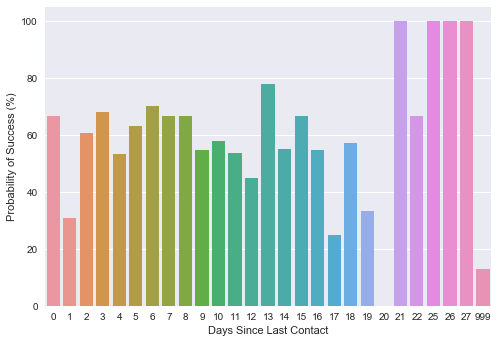

In [23]:
probability_pdays = df.loc[df['poutcome'].notna(), ('pdays', 'y')].groupby('pdays').mean().reset_index()
fig = sns.barplot(x=probability_pdays['pdays'],
                  y=probability_pdays['y'] * 100)
fig.set(ylabel='Probability of Success (%)',
        xlabel='Days Since Last Contact')

Looks like there are some latent variables affecting this. Perhaps they received responses getting them to make
contact with specific people.

[Text(0, 0.5, 'Counts'), Text(0.5, 0, 'Days Since Last Contact')]

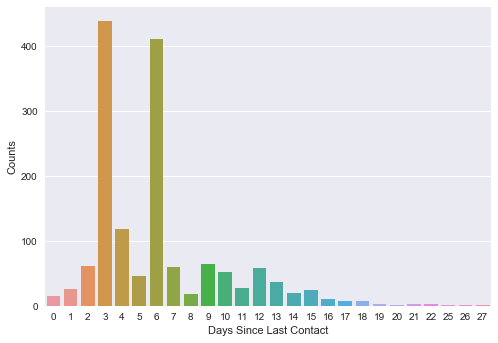

In [24]:
count_pdays = df.loc[df['poutcome'].notna(), 'pdays'].value_counts(sort=False).sort_index()
count_pdays.drop(999, inplace=True)
fig = sns.barplot(x=count_pdays.index,
                  y=count_pdays.values)
fig.set(ylabel='Counts',
        xlabel='Days Since Last Contact')